<a href="https://colab.research.google.com/github/Vinidroid31/ShelterTec/blob/main/mais_de_1_compra_Sprint_3_Statistics_ClickBus_3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 3 -  Statistics for Data Science & Machine Learning

Bruno Marcelo de Rosa		RM 563779

Danilo Oliveira Alves			RM 564109

Fred Henrique Ferreira de Sousa	RM 565725

Luana Fernandes Silva Ferreira	RM 560474

Vinicius de Sousa Macedo		RM 561911

1. Uma função em python que receba um conjunto de dados de entrada e um tipo de amostragem como parametro e gere a amostragem de dados de acordo com o tipo de amostragem passada como parametro. Ex.: gera_amostragem(df, "aleatoria") e deve retornar uma amostragem aleatória. [20 pontos]

2. Crie uma função chamada feature_engineering, essa função deve checar se há dados faltantes no conjunto de dados e eliminalos, aplicar padronização nos dados (standardscaler), alterar duas colunas categóricas a sua escolha usando a função map. [20 pontos]

3. Crie uma função que receba dois parametros de entrada, caso os parametros de entrada sejam numericos retorne a soma dos valores, caso seja texto concatene, caso seja um numero e um valor concatene, a função não deve retornar erro independente dos parametros passados. [20 pontos]

4. Gere um conjunto de dados com as seguintes caracteristicas: A variável y deve ser binária se o cliente da Clickbus realizou uma compra nos ultimos 30 dias, a variável X deve ser demais caracteristicas que o grupo ache interessante. Trate os dados e aplique as função sigmoid, Gradient Descendent e predict, desenvolvidas em aula. [40 pontos]

#Bibliotecas e leitura dos dados

In [ ]:
import pandas as pd
import numpy as np
import gdown
import numbers
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
url_df_t = "https://drive.google.com/uc?id=1H43N5nTAWX7TdPIkX1G3nf50bxTw18JD"
out_df_t= "challenge.csv"

gdown.download(url_df_t, out_df_t)

Downloading...
From (original): https://drive.google.com/uc?id=1H43N5nTAWX7TdPIkX1G3nf50bxTw18JD
From (redirected): https://drive.google.com/uc?id=1H43N5nTAWX7TdPIkX1G3nf50bxTw18JD&confirm=t&uuid=14d4de2b-927a-473b-a4b3-b38c8780f211
To: /content/challenge.csv
100%|██████████| 660M/660M [00:07<00:00, 91.2MB/s]


'challenge.csv'

In [ ]:
df = pd.read_csv('/content/challenge.csv', index_col = 0)

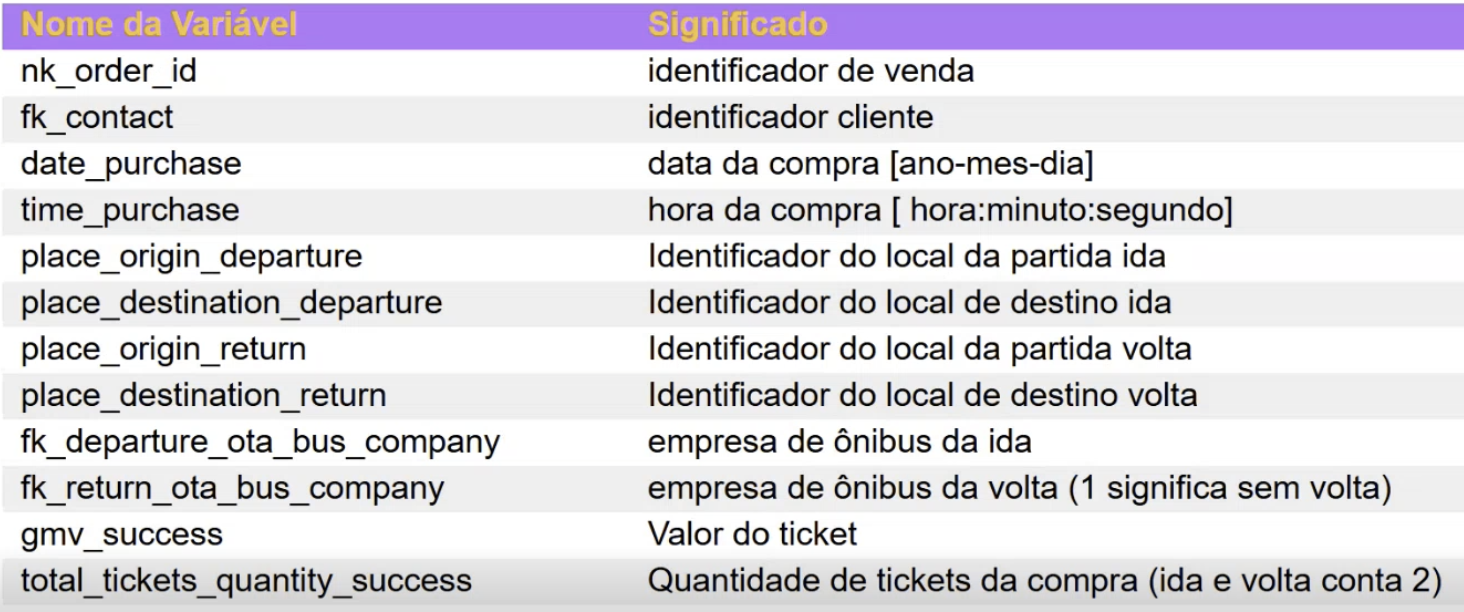

#Analise exploratória dos dados

In [ ]:
# Verificar os tipos de dados e nossas colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1741344 entries, bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef1fee010c95dcbbab9 to 113a96cafbc0fc70ab6cfba8bc017c57e720366265820c128b3ecc23f846a628
Data columns (total 11 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   fk_contact                      object 
 1   date_purchase                   object 
 2   time_purchase                   object 
 3   place_origin_departure          object 
 4   place_destination_departure     object 
 5   place_origin_return             object 
 6   place_destination_return        object 
 7   fk_departure_ota_bus_company    object 
 8   fk_return_ota_bus_company       object 
 9   gmv_success                     float64
 10  total_tickets_quantity_success  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 159.4+ MB


In [ ]:
df.shape

(1741344, 11)

In [ ]:
df.isnull().sum()

,0
fk_contact,0
date_purchase,0
time_purchase,0
place_origin_departure,0
place_destination_departure,0
place_origin_return,0
place_destination_return,0
fk_departure_ota_bus_company,0
fk_return_ota_bus_company,0
gmv_success,0


In [ ]:
# primeiras 5 linhas do DataFrame
df.head()

,fk_contact,date_purchase,time_purchase,place_origin_departure,place_destination_departure,place_origin_return,place_destination_return,fk_departure_ota_bus_company,fk_return_ota_bus_company,gmv_success,total_tickets_quantity_success
nk_ota_localizer_id,,,,,,,,,,,
bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef1fee010c95dcbbab9,a7218ff4ee7d37d48d2b4391b955627cb089870b934912...,2018-12-26,15:33:35,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,50e9a8665b62c8d68bccc77c7c92431a1aa26ccbd38ed4...,0,0,8527a891e224136950ff32ca212b45bc93f69fbb801c3b...,1,89.09,1
5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e76c53e661b07ed7fb8,37228485e0dc83d84d1bcd1bef3dc632301bf6cb22c8b5...,2018-12-05,15:07:57,10e4e7caf8b078429bb1c80b1a10118ac6f963eff098fd...,e6d41d208672a4e50b86d959f4a6254975e6fb9b088116...,0,0,36ebe205bcdfc499a25e6923f4450fa8d48196ceb4fa0c...,1,155.97,1
fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec869b8b02d6c729858,3467ec081e2421e72c96e7203b929d21927fd00b6b5f28...,2018-12-21,18:41:54,7688b6ef52555962d008fff894223582c484517cea7da4...,8c1f1046219ddd216a023f792356ddf127fce372a72ec9...,0,0,ec2e990b934dde55cb87300629cedfc21b15cd28bbcf77...,1,121.99,1
4dc44a6dd592b702feccb493d192210c86965aee68452989fa44926bd8e0a421,ab3251a2be0f69713b8f97b0e9d1579e31551f4fd4facf...,2018-12-06,14:01:38,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,d6acb3c1a79e57bcc03d976cb4d98f56edccd4cf426392...,0,0,5f9c4ab08cac7457e9111a30e4664920607ea2c115a143...,1,55.22,1
aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f2a990463e6eec11d3,ceea0de820a6379f2c4215bddaec66c33994b304607e56...,2021-02-23,20:08:25,7688b6ef52555962d008fff894223582c484517cea7da4...,23765fc69c4e3c0b10f5d15471dc2245e2a19af16b513f...,0,0,48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c...,1,45.31,1


In [ ]:
# Ultimas 5 linhas do DataFrame
df.tail()

,fk_contact,date_purchase,time_purchase,place_origin_departure,place_destination_departure,place_origin_return,place_destination_return,fk_departure_ota_bus_company,fk_return_ota_bus_company,gmv_success,total_tickets_quantity_success
nk_ota_localizer_id,,,,,,,,,,,
4e4f5fcded3e8b6915e05c6b9b504ec6830f723a831f6876c2ae97f85d7418c2,6b45fe9186baa7894b96bc7cdb801ce2c14427992217a5...,2023-12-29,19:47:12,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,0,0,3068430da9e4b7a674184035643d9e19af3dc7483e31cc...,1,156.00,1
8bcfd696bb80f3433449c1442e4c6bab55d4bce9fe4311cb4e4a3086796fcc9c,be5b840765a5a2e316478410777a949fb6210cfe310fdf...,2019-08-01,10:06:37,7688b6ef52555962d008fff894223582c484517cea7da4...,37834f2f25762f23e1f74a531cbe445db73d6765ebe608...,0,0,ec2e990b934dde55cb87300629cedfc21b15cd28bbcf77...,1,106.93,2
1924fa1e8daf5821b3d062ac29d1ba56c70a54b41a177bd7a2484c355635ca2c,72b052cfc6d04db064a5723e2faee0296e09d5e59689f1...,2019-01-18,10:28:42,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,ef2d127de37b942baad06145e54b0c619a1f22327b2ebb...,0,0,c17edaae86e4016a583e098582f6dbf3eccade8ef83747...,1,92.77,1
18b75368642c6c347fd00f56cd98322bb6d920b6a07545833000ecb4b37e8a8b,6b45fe9186baa7894b96bc7cdb801ce2c14427992217a5...,2023-01-08,23:57:55,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,0,0,35135aaa6cc23891b40cb3f378c53a17a1127210ce60e1...,1,294.99,1
113a96cafbc0fc70ab6cfba8bc017c57e720366265820c128b3ecc23f846a628,3b3d7594bde1223635a1f2fd8b547172e689ed8d711f84...,2023-01-14,21:40:39,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,0,0,1dfacb2ea5a03e0a915999e03b5a56196f1b1664d2f768...,1,158.95,1


In [ ]:
# mostra a quantidade de dados unicos
df.nunique()

,0
fk_contact,581817
date_purchase,3835
time_purchase,83937
place_origin_departure,2551
place_destination_departure,2899
place_origin_return,1859
place_destination_return,1419
fk_departure_ota_bus_company,299
fk_return_ota_bus_company,275
gmv_success,83218


# Tirar os dados do HASH

In [ ]:
# concatenar colunas e aplicar um codigo unico
colunas_cidade = [
    'place_origin_departure',
    'place_destination_departure',
    'place_origin_return',
    'place_destination_return'
]

hashes_validos_cidades = np.concatenate([
    df[col][df[col] != '0'].unique() for col in colunas_cidade
])

hashes_cidade_unicos = pd.Series(hashes_validos_cidades).unique()
mapeamento_cidades = {h: i for i, h in enumerate(hashes_cidade_unicos)}

def gerar_legenda_cidades(hash_val):
    if hash_val == '0':
        return '0'
    return f'Cidade_{mapeamento_cidades.get(hash_val, "NA")}'

for col in colunas_cidade:
    legenda = col + '_legend'
    df[legenda] = df[col].map(gerar_legenda_cidades)

In [ ]:
colunas_empresas = [
    'fk_departure_ota_bus_company',
    'fk_return_ota_bus_company'
]

hashes_validos_empresas = np.concatenate([
    df[col][df[col] != '0'].unique() for col in colunas_empresas
])
hashes_empresas_unicos = pd.Series(hashes_validos_empresas).unique()
mapeamento_empresas = {h: i for i, h in enumerate(hashes_empresas_unicos)}

def gerar_legenda_empresas(hash_val):
  if hash_val == '1':
    return f'1'
  return f'Empresa_{mapeamento_empresas.get(hash_val, "NA")}'

for col in colunas_empresas:
  legenda = col+'_legend'
  df[legenda] = df[col].map(gerar_legenda_empresas)

In [ ]:
# Para clientes:
df['fk_contact_legend'] = df['fk_contact'].astype('category').cat.codes
df['fk_contact_legend'] = 'Cliente_' + df['fk_contact_legend'].astype(str)

In [ ]:
# Guardar os dados originais (em hash) em dicionários, para consultas futuras e remoção no df para facilitar visualização
mapa_fk_contact = dict(zip(df['fk_contact_legend'], df['fk_contact']))
mapa_place_origin_departure = dict(zip(df['place_origin_departure_legend'], df['place_origin_departure']))
mapa_place_destination_departure = dict(zip(df['place_destination_departure_legend'], df['place_destination_departure']))
mapa_place_origin_return = dict(zip(df['place_origin_return_legend'], df['place_origin_return']))
mapa_place_destination_return = dict(zip(df['place_destination_return_legend'], df['place_destination_return']))
mapa_fk_departure_ota_bus_company = dict(zip(df['fk_departure_ota_bus_company_legend'], df['fk_departure_ota_bus_company']))
mapa_fk_return_ota_bus_company = dict(zip(df['fk_return_ota_bus_company_legend'], df['fk_return_ota_bus_company']))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1741344 entries, bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef1fee010c95dcbbab9 to 113a96cafbc0fc70ab6cfba8bc017c57e720366265820c128b3ecc23f846a628
Data columns (total 18 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   fk_contact                           object 
 1   date_purchase                        object 
 2   time_purchase                        object 
 3   place_origin_departure               object 
 4   place_destination_departure          object 
 5   place_origin_return                  object 
 6   place_destination_return             object 
 7   fk_departure_ota_bus_company         object 
 8   fk_return_ota_bus_company            object 
 9   gmv_success                          float64
 10  total_tickets_quantity_success       int64  
 11  place_origin_departure_legend        object 
 12  place_destination_departure_legend   object 
 13  place_origin_retu

In [ ]:
# drop das variaveis para limpar o df
df = df.drop(['fk_contact', 'place_origin_departure', 'place_origin_return', 'place_destination_return', 'place_destination_departure', 'fk_departure_ota_bus_company', 'fk_return_ota_bus_company'], axis=1)

# Rename das variaveis

In [ ]:
df = df.rename(columns={
    'date_purchase': 'data_compra',
  'fk_contact_legend': 'id_cliente',
  'place_origin_departure_legend': 'origem_ida',
  'place_destination_departure_legend': 'destino_ida',
  'place_origin_return_legend': 'origem_volta',
  'place_destination_return_legend': 'destino_volta',
  'fk_departure_ota_bus_company_legend': 'empresa_ida',
  'fk_return_ota_bus_company_legend': 'empresa_volta',
  'total_tickets_quantity_success': 'quantidade_tickets',
})

# Concatenação das variáveis

In [ ]:
def operacao_flexivel(param1, param2):
  if isinstance(param1, numbers.Number) and isinstance(param2, numbers.Number):
    return param1 + param2
  else:
    return str(param1) + str(param2)

df['info_compra'] = df.apply(lambda row: operacao_flexivel(row['id_cliente'], row['empresa_ida']), axis=1)
print(df[['id_cliente', 'empresa_ida', 'info_compra']].head())

                                                        id_cliente  \
nk_ota_localizer_id                                                  
bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef...  Cliente_380081   
5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e7...  Cliente_125030   
fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec...  Cliente_118673   
4dc44a6dd592b702feccb493d192210c86965aee6845298...  Cliente_389356   
aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f...  Cliente_470537   

                                                   empresa_ida  \
nk_ota_localizer_id                                              
bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef...   Empresa_0   
5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e7...   Empresa_1   
fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec...   Empresa_2   
4dc44a6dd592b702feccb493d192210c86965aee6845298...   Empresa_3   
aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f...   Empresa_4   

                                              

In [ ]:
inicial_date = df['data_compra'].min()
final_date = df['data_compra'].max()

print(f"Data Inicial dos Dados: {inicial_date}")
print(f"Data Final dos Dados: {final_date}")

Data Inicial dos Dados: 2013-09-12
Data Final dos Dados: 2024-04-01


In [ ]:
# concatena as variaveis data e hora
df['date_time_purchase'] = pd.to_datetime(
    df['data_compra'].astype(str) + ' ' + df['time_purchase'].astype(str),
    errors='coerce'
)

# recorte para mês fechado
data_inicial = pd.to_datetime("2013-01-11")
data_final = pd.to_datetime("2024-03-31")

In [ ]:
# Categorizar time_purchase em manhã, tarde, noite, madrugada
df['time_purchase'] = pd.to_datetime(df['time_purchase'], format='%H:%M:%S', errors='coerce')
df['hora_compra'] = df['time_purchase'].dt.hour

def periodo_do_dia(hora):
    if pd.isna(hora):
        return 'indefinido'
    elif 5 <= hora < 12:
        return 'manhã'
    elif 12 <= hora < 18:
        return 'tarde'
    elif 18 <= hora < 24:
        return 'noite'
    else: # hora < 5
        return 'madrugada'

df['periodo_compra'] = df['hora_compra'].apply(periodo_do_dia)

df = df[(df['date_time_purchase'] >= data_inicial) & (df['date_time_purchase'] <= data_final)].copy()
df = df.drop(['time_purchase', 'hora_compra'], axis=1)

### Remoção de outliers

In [ ]:
# quantidade comprada de tickets por usuário
df['quantidade_tickets'].value_counts()

,count
quantidade_tickets,
1,1250595
2,388391
4,52127
3,34119
6,5948
5,4242
8,2471
10,869
12,39


In [ ]:
print("Análise de Outliers - Quantidade de Tickets:")
Q1 = df['quantidade_tickets'].quantile(0.25)
Q3 = df['quantidade_tickets'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1 (25%): {Q1}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR}")
print(f"Limite superior para outliers (Q3 + 1.5*IQR): {limite_superior}")

outliers = df[df['quantidade_tickets'] > limite_superior]
print(f"\nOutliers (acima de {limite_superior:.1f} tickets): {len(outliers)} compras")
print(f"Percentual de outliers: {len(outliers)/len(df)*100:.2f}%")

print(f"\nDistribuição de quantidade de tickets:")
freq_tickets = df['quantidade_tickets'].value_counts().sort_index()
for valor, freq in freq_tickets.head(10).items():
    percentual = (freq / len(df)) * 100
    print(f"{valor} tickets: {freq:,} compras ({percentual:.2f}%)")

print(f"• Conservador (95º percentil): {df['quantidade_tickets'].quantile(0.95):.0f} tickets")
print(f"• Moderado (99º percentil): {df['quantidade_tickets'].quantile(0.99):.0f} tickets")
print(f"• Estatístico (Q3 + 1.5*IQR): {limite_superior:.1f} tickets")

Análise de Outliers - Quantidade de Tickets:
Q1 (25%): 1.0
Q3 (75%): 2.0
IQR: 1.0
Limite superior para outliers (Q3 + 1.5*IQR): 3.5

Outliers (acima de 3.5 tickets): 65747 compras
Percentual de outliers: 3.78%

Distribuição de quantidade de tickets:
1 tickets: 1,250,595 compras (71.92%)
2 tickets: 388,391 compras (22.34%)
3 tickets: 34,119 compras (1.96%)
4 tickets: 52,127 compras (3.00%)
5 tickets: 4,242 compras (0.24%)
6 tickets: 5,948 compras (0.34%)
7 tickets: 19 compras (0.00%)
8 tickets: 2,471 compras (0.14%)
9 tickets: 24 compras (0.00%)
10 tickets: 869 compras (0.05%)
• Conservador (95º percentil): 3 tickets
• Moderado (99º percentil): 4 tickets
• Estatístico (Q3 + 1.5*IQR): 3.5 tickets


In [ ]:
# cria uma nova variavel para categorizar a faixa de tickets
df['faixa_tickets'] = df['quantidade_tickets'].apply(lambda x: str(x) if x < 4 else '4+')
print(df['faixa_tickets'].value_counts(normalize=True))

faixa_tickets
1     0.719207
2     0.223361
4+    0.037811
3     0.019622
Name: proportion, dtype: float64


# Amostragem de dados

In [ ]:
# Função para gerar amostragem
def df_amostragem(df, tipo, n=100, coluna_estrato=None):
    if tipo == "aleatoria":
        return df.sample(n=n, random_state=42)
    elif tipo == "sistematica":
        step = len(df) // n
        indices = np.arange(0, len(df), step)[:n]
        return df.iloc[indices]
    elif tipo == "estratificada":
        if coluna_estrato is None:
            raise ValueError("Para amostragem estratificada, informe a coluna_estrato.")
        grupos = df.groupby(coluna_estrato, group_keys=False)
        amostras = [grupo.sample(int(np.ceil(n / grupos.ngroups)), random_state=42) for _, grupo in grupos]
        return pd.concat(amostras)
    else:
        raise ValueError("Tipo de amostragem não reconhecido. Escolha entre 'aleatoria', 'sistematica' ou 'estratificada'.")

In [ ]:
df_amostragem(df, "aleatoria", n=20)

,data_compra,gmv_success,quantidade_tickets,origem_ida,destino_ida,origem_volta,destino_volta,empresa_ida,empresa_volta,id_cliente,info_compra,date_time_purchase,periodo_compra,faixa_tickets
nk_ota_localizer_id,,,,,,,,,,,,,,
78132ab64332ebe13fe1304e36829aa53493d6b36628f33ef1fe7dd29098fe2a,2023-12-02,394.12,1,Cidade_63,Cidade_364,0,0,Empresa_135,1,Cliente_215491,Cliente_215491Empresa_135,2023-12-02 19:33:38,noite,1
2ff47230a5584f03b8b2598216f75c6a23544e8523ba84038697cf426889cae3,2017-12-18,34.63,1,Cidade_263,Cidade_28,0,0,Empresa_56,1,Cliente_544952,Cliente_544952Empresa_56,2017-12-18 03:37:08,madrugada,1
d0fc58a758d30e738f7ab257e0a1c47c3868957c33e8ac9afc38d6d5afe18c9b,2023-08-14,37.70,1,Cidade_52,Cidade_86,0,0,Empresa_11,1,Cliente_216298,Cliente_216298Empresa_11,2023-08-14 12:35:56,tarde,1
eb11b6237255f6546eda7e1839d3ae2ae1b08ae59ba0ac54d9516cbec15cee06,2019-03-15,171.47,1,Cidade_2,Cidade_349,0,0,Empresa_76,1,Cliente_238661,Cliente_238661Empresa_76,2019-03-15 22:15:40,noite,1
ae8620d640c8f1756ccce6ba6d54f97f10f98827e74d036df9fca7bcf50084e7,2022-03-28,159.29,1,Cidade_9,Cidade_97,0,0,Empresa_61,1,Cliente_91442,Cliente_91442Empresa_61,2022-03-28 13:52:38,tarde,1
c042d61811a151a068e6036d24aea2d98eae98f4fee01587271738dd98813d53,2018-06-21,40.47,1,Cidade_28,Cidade_263,0,0,Empresa_56,1,Cliente_231705,Cliente_231705Empresa_56,2018-06-21 13:09:51,tarde,1
36a424b3ab7327afc1f3a5f1030b4e3f3db3865e247375cfc604138cd5544311,2024-03-15,57.53,1,Cidade_0,Cidade_3,0,0,Empresa_3,1,Cliente_22705,Cliente_22705Empresa_3,2024-03-15 07:06:58,manhã,1
da5952b9641502fdbdeb5aa0e84a2b1edfd31e2d7c882ae0955e804c1aa6f763,2023-09-19,271.54,1,Cidade_71,Cidade_52,0,0,Empresa_11,1,Cliente_330,Cliente_330Empresa_11,2023-09-19 10:51:06,manhã,1
4688a81bf050736ea139f3d089fe940c0216f4e3237c9f927f304eebfc9dffd1,2023-08-23,505.36,2,Cidade_2,Cidade_5,0,0,Empresa_5,1,Cliente_38976,Cliente_38976Empresa_5,2023-08-23 16:40:26,tarde,2


# TESTE

In [ ]:
contador_compras = df.groupby('id_cliente')['id_cliente'].count()

In [ ]:
clientes_multicompras = contador_compras[contador_compras > 1].index

In [ ]:
df_filtrado = df[df['id_cliente'].isin(clientes_multicompras)].copy()

In [ ]:
df_filtrado.shape

(1428050, 14)

In [ ]:
df_filtrado.shape

(1428050, 14)

# Limpeza de dados

In [ ]:
negative_gmv_condition = df_filtrado['gmv_success'] <= 0
negative_gmv_count = negative_gmv_condition.sum()
print(f'Quantidade de valores negativos em valor_ticket: {negative_gmv_count}')

df_filtrado = df_filtrado[~negative_gmv_condition]

Quantidade de valores negativos em valor_ticket: 124


In [ ]:
iguais_origem_destino = df_filtrado['origem_ida'] == df_filtrado['destino_ida']
quantidade = iguais_origem_destino.sum()
print(f"Quantidade de linhas onde origem ida é igual a destino ida: {quantidade}")

df_filtrado = df_filtrado[~iguais_origem_destino]

Quantidade de linhas onde origem ida é igual a destino ida: 9646


In [ ]:
diferente_ida_volta = (df_filtrado['origem_ida'] != df_filtrado['destino_volta']) & (df_filtrado['destino_volta'] != '0')
quantidade = diferente_ida_volta.sum()
print(f"Quantidade de linhas onde origem ida é diferente de destino volta e destino volta é diferente de 0: {quantidade}")

df_filtrado = df_filtrado[~diferente_ida_volta]

Quantidade de linhas onde origem ida é diferente de destino volta e destino volta é diferente de 0: 1769


In [ ]:
condicao = (df_filtrado['quantidade_tickets'] == 1) & (df_filtrado['destino_volta'] != '0')
qtd_linhas = condicao.sum()
print(f"Quantidade de linhas que mostram que 1 ticket gerou passagem de ida e volta {qtd_linhas}")

df_filtrado = df_filtrado[~condicao]

Quantidade de linhas que mostram que 1 ticket gerou passagem de ida e volta 27


# Padronização dos dados

In [ ]:
coluna_analise = ['origem_ida', 'destino_ida', 'origem_volta', 'destino_volta']

limites_ideais = {}

meta_cobertura = 0.96

print(f"--- Iniciando Análise para {len(coluna_analise)} Colunas (Meta de Cobertura: {meta_cobertura:.0%}) ---\n")

for coluna in coluna_analise:
    frequencias = df_filtrado[coluna].value_counts()
    percentual_cumulativo = df_filtrado[coluna].value_counts(normalize=True).cumsum()

    categorias_necessarias = (percentual_cumulativo < meta_cobertura).sum() + 1

    if categorias_necessarias <= len(frequencias):
        limite_sugerido = frequencias.iloc[categorias_necessarias - 1]
    else:
        limite_sugerido = frequencias.iloc[-1]

    limites_ideais[coluna] = limite_sugerido

    print(f"Análise para '{coluna}':")
    print(f" -> Categorias necessárias: {categorias_necessarias}")
    print(f" -> Limite de frequência sugerido: {limite_sugerido}\n")

print(limites_ideais)

--- Iniciando Análise para 4 Colunas (Meta de Cobertura: 96%) ---

Análise para 'origem_ida':
 -> Categorias necessárias: 492
 -> Limite de frequência sugerido: 168

Análise para 'destino_ida':
 -> Categorias necessárias: 650
 -> Limite de frequência sugerido: 138

Análise para 'origem_volta':
 -> Categorias necessárias: 40
 -> Limite de frequência sugerido: 617

Análise para 'destino_volta':
 -> Categorias necessárias: 11
 -> Limite de frequência sugerido: 2029

{'origem_ida': np.int64(168), 'destino_ida': np.int64(138), 'origem_volta': np.int64(617), 'destino_volta': np.int64(2029)}


In [ ]:
def reduzir_cardinalidade_com_dicionario(df_original, limites_por_coluna):

    df_filtrado = df_original.copy()

    for coluna, limite in limites_por_coluna.items():
        print(f"Processando '{coluna}' com limite de frequência < {limite}...")

        frequencias = df_filtrado[coluna].value_counts()
        categorias_raras = frequencias[frequencias < limite].index

        novo_nome_coluna = f'{coluna}_agrupada'
        df_filtrado[novo_nome_coluna] = df_filtrado[coluna].replace(categorias_raras, 'OUTROS')

        print(f" -> Cardinalidade original: {df_filtrado[coluna].nunique()}")
        print(f" -> Nova cardinalidade: {df_filtrado[novo_nome_coluna].nunique()}\n")

    return df_filtrado

df_tratado = reduzir_cardinalidade_com_dicionario(df_filtrado, limites_ideais)

Processando 'origem_ida' com limite de frequência < 168...
 -> Cardinalidade original: 2442
 -> Nova cardinalidade: 497

Processando 'destino_ida' com limite de frequência < 138...
 -> Cardinalidade original: 2749
 -> Nova cardinalidade: 653

Processando 'origem_volta' com limite de frequência < 617...
 -> Cardinalidade original: 1694
 -> Nova cardinalidade: 41

Processando 'destino_volta' com limite de frequência < 2029...
 -> Cardinalidade original: 1275
 -> Nova cardinalidade: 12



In [ ]:
data_referencia = df_tratado['date_time_purchase'].max()

df_alvo_cliente = df_tratado.groupby('id_cliente')['date_time_purchase'].max().reset_index()
df_alvo_cliente.rename(columns={'date_time_purchase': 'data_ultima_compra'}, inplace=True)
df_alvo_cliente['dias_desde_ultima_compra'] = (data_referencia - df_alvo_cliente['data_ultima_compra']).dt.days
df_alvo_cliente['comprou_ultimos_30_dias'] = (df_alvo_cliente['dias_desde_ultima_compra'] <= 30).astype(int)

df_features_cliente = df_tratado.groupby('id_cliente').agg(
    total_tickets=('quantidade_tickets', 'sum'),
    gmv_total=('gmv_success', 'sum'),
    gmv_medio_por_ticket=('gmv_success', 'mean'),
    total_compras=('id_cliente', 'count'),


    origem_ida_mais_frequente=('origem_ida_agrupada', lambda x: x.mode()[0]),
    destino_ida_mais_frequente=('destino_ida_agrupada', lambda x: x.mode()[0]),
    origem_volta_mais_frequente=('origem_volta_agrupada', lambda x: x.mode()[0]),
    destino_volta_mais_frequente=('destino_volta_agrupada', lambda x: x.mode()[0]),
    periodo_compra_mais_frequente=('periodo_compra', lambda x: x.mode()[0]),
    faixa_tickets_mais_frequente=('faixa_tickets', lambda x: x.mode()[0])
).reset_index()

df_clientes_final = pd.merge(df_features_cliente, df_alvo_cliente[['id_cliente', 'comprou_ultimos_30_dias']], on='id_cliente')

print("\nPré-visualização do DataFrame final:")
print(df_clientes_final.head())


Pré-visualização do DataFrame final:
       id_cliente  total_tickets  gmv_total  gmv_medio_por_ticket  \
0       Cliente_1              2     162.00                81.000   
1      Cliente_10              2     379.28               189.640   
2     Cliente_100              2     565.69               282.845   
3   Cliente_10000              3     212.17               106.085   
4  Cliente_100002              3     277.39               138.695   

   total_compras origem_ida_mais_frequente destino_ida_mais_frequente  \
0              2                 Cidade_29                 Cidade_130   
1              2                Cidade_116                 Cidade_116   
2              2                Cidade_125                 Cidade_125   
3              2                Cidade_141                 Cidade_141   
4              2                 Cidade_17                   Cidade_3   

  origem_volta_mais_frequente destino_volta_mais_frequente  \
0                           0                 

In [ ]:
def df_amostragem(df, tipo, n=100, coluna_estrato=None):
    if tipo == "aleatoria":
        return df.sample(n=n, random_state=42)
    elif tipo == "sistematica":
        step = len(df) // n
        indices = np.arange(0, len(df), step)[:n]
        return df.iloc[indices]
    elif tipo == "estratificada":
        if coluna_estrato is None:
            raise ValueError("Para amostragem estratificada, informe a coluna_estrato.")
        proporcoes = df[coluna_estrato].value_counts(normalize=True)
        amostras = []
        for classe, prop in proporcoes.items():
            n_amostra = int(round(n * prop))
            df_classe = df[df[coluna_estrato] == classe]
            if n_amostra > len(df_classe):
                n_amostra = len(df_classe)  # não pode amostrar mais que o total
            amostras.append(df_classe.sample(n=n_amostra, random_state=42))
        return pd.concat(amostras)
    else:
        raise ValueError("Tipo de amostragem não reconhecido. Escolha entre 'aleatoria', 'sistematica' ou 'estratificada'.")

In [ ]:
df_amostra = df_amostragem(df_clientes_final, "estratificada", n=200000, coluna_estrato="comprou_ultimos_30_dias")

In [ ]:
df_amostra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 182792 to 123615
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id_cliente                     200000 non-null  object 
 1   total_tickets                  200000 non-null  int64  
 2   gmv_total                      200000 non-null  float64
 3   gmv_medio_por_ticket           200000 non-null  float64
 4   total_compras                  200000 non-null  int64  
 5   origem_ida_mais_frequente      200000 non-null  object 
 6   destino_ida_mais_frequente     200000 non-null  object 
 7   origem_volta_mais_frequente    200000 non-null  object 
 8   destino_volta_mais_frequente   200000 non-null  object 
 9   periodo_compra_mais_frequente  200000 non-null  object 
 10  faixa_tickets_mais_frequente   200000 non-null  object 
 11  comprou_ultimos_30_dias        200000 non-null  int64  
dtypes: float64(2), int64(3), objec

In [ ]:
def feature_engineering(df_original):
    df_amostra = df_original.copy()

    if df_amostra.isnull().sum().any():
        df_amostra.dropna(inplace=True)
        print(f"Formato após remoção de NaNs: {df_amostra.shape}")
    else:
        print("Nenhum dado faltante encontrado.")

    periodo_map = {'madrugada': 0, 'manhã': 1, 'tarde': 2, 'noite': 3}
    df_amostra['periodo_compra_num'] = df_amostra['periodo_compra_mais_frequente'].map(periodo_map)
    faixa_tickets_map = {'1': 1, '2': 2, '3': 3, '4+': 4}
    df_amostra['faixa_tickets_num'] = df_amostra['faixa_tickets_mais_frequente'].map(faixa_tickets_map)

    colunas_para_padronizar = ['periodo_compra_num', 'faixa_tickets_num']
    scaler = StandardScaler()

    df_amostra[colunas_para_padronizar] = scaler.fit_transform(df_amostra[colunas_para_padronizar])

    return df_amostra

df_amostra = feature_engineering(df_amostra)


Nenhum dado faltante encontrado.


In [ ]:
colunas_para_encoder = [
    'origem_ida_mais_frequente',
    'destino_ida_mais_frequente',
    'origem_volta_mais_frequente',
    'destino_volta_mais_frequente'
]

df_amostra = pd.get_dummies(df_clientes_final, columns=colunas_para_encoder, drop_first=True)

In [ ]:
colunas_para_padronizar = [
    'total_tickets',
    'gmv_total',
    'gmv_medio_por_ticket',
    'total_compras'
]

scaler = StandardScaler()

df_amostra[colunas_para_padronizar] = scaler.fit_transform(df_amostra[colunas_para_padronizar])

In [ ]:
X = df_amostra.drop(columns=['id_cliente',
                            'comprou_ultimos_30_dias',
                            'periodo_compra_mais_frequente',
                            'faixa_tickets_mais_frequente'])

y = df_amostra['comprou_ultimos_30_dias']

In [ ]:
from sklearn.model_selection import train_test_split

X_treino_val, X_teste, y_treino_val, y_teste = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)

X_treino, X_validacao, y_treino, y_validacao = train_test_split(
    X_treino_val, y_treino_val, test_size=0.25, random_state=42, stratify=y_treino_val)

print(f"\nTudo pronto! Seus dados foram divididos em {len(X_treino)} amostras de treino, {len(X_validacao)} de validação e {len(X_teste)} de teste.")


Tudo pronto! Seus dados foram divididos em 161837 amostras de treino, 53946 de validação e 53946 de teste.


In [ ]:
def sigmoid(z):

  return 1 / (1 + np.exp(-z))

def GradientDescent(X, y, learning_rate, iteracoes):

    if isinstance(X, pd.DataFrame):
        X = X.values
    X = np.array(X, dtype=float)

    if isinstance(y, pd.Series):
        y = y.values
    y = np.array(y, dtype=float).ravel()

    X_b = np.c_[np.ones((len(X), 1)), X]
    n_samples, n_features = X_b.shape

    pesos = np.zeros(n_features)

    for _ in range(iteracoes):
        modelo_linear = np.dot(X_b, pesos)
        y_predito = sigmoid(modelo_linear)
        gradiente = np.dot(X_b.T, (y_predito - y)) / n_samples
        pesos -= learning_rate * gradiente

    return pesos


def predict(X, pesos):

    if isinstance(X, pd.DataFrame):
        X = X.values
    X = np.array(X, dtype=float)

    X_b = np.c_[np.ones((len(X), 1)), X]
    modelo_linear = np.dot(X_b, pesos)
    y_probabilidade = sigmoid(modelo_linear)
    y_predito_classe = [1 if i > 0.5 else 0 for i in y_probabilidade]

    return np.array(y_predito_classe)


In [ ]:
X_treino = np.array(X_treino, dtype=float)
y_treino = np.array(y_treino, dtype=float)

In [ ]:
X_teste = np.array(X_teste, dtype=float)
y_teste = np.array(y_teste, dtype=float)

In [ ]:
X_treino_val = np.array(X_treino_val, dtype=float)
y_treino_val = np.array(y_treino_val, dtype=float)

In [ ]:
learning_rate = 0.01
iteracoes = 1000
pesos_aprendidos = GradientDescent(X_treino, y_treino, learning_rate, iteracoes)

In [ ]:
X_teste = np.array(X_teste, dtype=float)
predicoes_finais = predict(X_teste, pesos_aprendidos)


In [ ]:
pesos = GradientDescent(X_treino, y_treino, learning_rate=0.01, iteracoes=1000)

predicoes = predict(X_teste, pesos)

from sklearn.metrics import accuracy_score, classification_report

acuracia = accuracy_score(y_teste, predicoes)
print(f"\nAcurácia final do modelo no conjunto de teste: {acuracia:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_teste, predicoes))


Acurácia final do modelo no conjunto de teste: 0.9387

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     50642
         1.0       0.49      0.01      0.03      3304

    accuracy                           0.94     53946
   macro avg       0.71      0.51      0.50     53946
weighted avg       0.91      0.94      0.91     53946



In [ ]:
pesos = GradientDescent(X_treino_balanceado, y_treino_balanceado, learning_rate=0.01, iteracoes=1000)

predicoes = predict(X_teste, pesos)

acuracia = accuracy_score(y_teste, predicoes)
print(f"\nAcurácia final do modelo (com dados balanceados): {acuracia:.4f}")

print("\nRelatório de Classificação (com dados balanceados):")
print(classification_report(y_teste, predicoes))


Acurácia final do modelo (com dados balanceados): 0.7758

Relatório de Classificação (com dados balanceados):
              precision    recall  f1-score   support

           0       0.98      0.79      0.87     26890
           1       0.05      0.44      0.10       754

    accuracy                           0.78     27644
   macro avg       0.52      0.61      0.48     27644
weighted avg       0.95      0.78      0.85     27644



In [ ]:
from imblearn.over_sampling import SMOTE

# X_treino and y_treino are your original training data
print("Formato original dos dados de treino:")
print(X_treino.shape)
print(pd.Series(y_treino).value_counts())

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Apply rebalancing ONLY to the training data
X_treino_balanceado, y_treino_balanceado = smote.fit_resample(X_treino, y_treino)

print("\nFormato dos dados de treino APÓS o balanceamento:")
print(X_treino_balanceado.shape)
print(pd.Series(y_treino_balanceado).value_counts())

Formato original dos dados de treino:
(161837, 1203)
0.0    151924
1.0      9913
Name: count, dtype: int64


In [ ]:
print(df_clientes_final['total_compras'].value_counts().sort_index().head(10))

total_compras
1     107959
2      18454
3       5767
4       2566
5       1253
6        749
7        434
8        273
9        194
10       128
Name: count, dtype: int64
